# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Diego Rodríguez Romero

- ID: A01741413

- My carreer: ITC


#Mount on Drive

In [1]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/ColabNotebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            =  "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta = ""

Mounted at /content/drive


# Importing libraries

In [73]:
#We import all the libraries needed
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np                  # For array
from sklearn.cluster import KMeans

# PART 1
# Use your assigned dataset

## A1 Load data

In [49]:
#Dataset url
url = Ruta + "A01741413_X.csv"

#Load dataset
df = pd.read_csv(url)

## A2 Data managment


Print the first 7 rows

In [6]:
#We use head and pass the optional argument n to print the first n rows
df_first_seven = df.head(7)
df_first_seven

,Unnamed: 0,x1,x2,x3,x4
0,0,6.267097,-1.981469,-7.921625,6.529245
1,1,8.981154,6.372085,-9.468937,7.878236
2,2,11.730386,4.675443,-11.198126,9.376762
3,3,7.734167,2.228510,-10.856989,7.537230
4,4,9.938866,1.907787,-7.033765,5.774997
5,5,6.203067,2.042521,-12.495079,6.804844
6,6,5.357893,-2.888261,-10.771297,7.805041


Print the last 4 rows

In [7]:
#Similar to head, this time we use tail and pass the argument of the last n tails
df_last_four = df.tail(4)
df_last_four

,Unnamed: 0,x1,x2,x3,x4
263,263,7.301346,-1.805849,-5.611247,6.575809
264,264,10.480461,1.545009,-8.714995,7.726354
265,265,9.919444,5.835001,-11.745777,8.440677
266,266,5.988784,5.094266,-7.246493,6.075497


How many rows and columns are in your data?

Use the `shape` method


In [9]:
#Shape method gives us a pair of (Num of Rows X Num of Columns)
df_shape = df.shape
#df_shape

print("The number of Rows is", df.shape[0])
print("The number of Columns is", df.shape[1])

The number of Rows is 267
The number of Columns is 5


Print the name of all columns

Use the `columns` method

In [10]:
#Columns names can be viewed using the columns method
df_columns = df.columns
df_columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4'], dtype='object')

What is the data type in each column

Use the `dtypes` method

In [11]:
#dtype returns the data type of each column (Variable)
df_types = df.dtypes
df_types

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
dtype: object

What is the meaning of rows and columns?

In [ ]:
# Your answers here

#1) The first column has no name but goes 0,1,2,3.... so I can assume it is an ID or a test number, these variables can be treated as categorical.
#2) The second column has x1 as a name, only with that information I can't know what the values ​​in that column are only that they are floats
#3) The name of this column is x2, just like before I could only guess what those values ​​represent, they are also floats but I identify that it has both positive and negative numbers.
#4) The column name is x3, and just looking at the head and tail it may seem like it only has negative values
#5) The last column is x4, its characteristics are similar to the other 3 non-categorical variables.

#The rows represent the values ​​or measurements of a specific test or sample

Print a statistical summary of your columns


In [12]:
# Summary statistics for the quantitative variables
df.describe()

,Unnamed: 0,x1,x2,x3,x4
count,267.000000,267.000000,267.000000,267.000000,267.000000
mean,133.000000,8.388947,1.916540,-9.597551,7.108586
std,77.220464,2.531365,2.938347,1.944204,2.159918
min,0.000000,-0.164981,-5.369655,-14.916227,0.651796
25%,66.500000,6.515632,-0.382323,-10.745871,5.734753
50%,133.000000,8.548484,2.047556,-9.598223,7.128621
75%,199.500000,9.971359,4.322816,-8.253909,8.372005
max,266.000000,15.207664,9.382553,-4.049628,12.948527


In [ ]:
# 1) What is the minumum and maximum values of each variable

# Unnamed : (0,266)
# x1 : (-0.164981	, 15.207664	)
# x2 : (-5.369655	, 9.382553 )
# x3 : (-14.916227, -4.049628	)
# x4 : ( 0.651796, 12.948527)

# 2) What is the mean and standar deviation of each variable

# Unnamed : ( 133 , 77.220464	)
# x1 : (8.388947	, 2.531365		)
# x2 : ( 1.916540	, 2.938347 )
# x3 : ( -9.597551, 1.944204	)
# x4 : ( 7.108586, 2.159918)


# 3) What the 25%, 50% and 75% represent?

# In a box plot, the data is divided into quartiles, that is sections that contain around 25% of the data. The box is formed with the 25% and 75% line,
#where the left or lower line of the box is the 25% and the right or upper line would be the 75%. And the line that we see in the middle of the box is
# the 50%, that is the median value


Rename the columns using the same name with capital letters

In [14]:
#I will give the first column the name ID from this point on
df = df.rename(columns={"Unnamed: 0": "ID","x1": "X1", "x2": "X2", "x3": "X3", "x4": "X4"})

df.head()

,ID,X1,X2,X3,X4
0,0,6.267097,-1.981469,-7.921625,6.529245
1,1,8.981154,6.372085,-9.468937,7.878236
2,2,11.730386,4.675443,-11.198126,9.376762
3,3,7.734167,2.228510,-10.856989,7.537230
4,4,9.938866,1.907787,-7.033765,5.774997


Rename the columns to their original names

In [15]:
df = df.rename(columns={"ID": "id","X1": "x1", "X2": "x2", "X3": "x3", "X4": "x4"})

df.head()

,id,x1,x2,x3,x4
0,0,6.267097,-1.981469,-7.921625,6.529245
1,1,8.981154,6.372085,-9.468937,7.878236
2,2,11.730386,4.675443,-11.198126,9.376762
3,3,7.734167,2.228510,-10.856989,7.537230
4,4,9.938866,1.907787,-7.033765,5.774997


Use two different alternatives to get one of the columns

In [16]:
a = df.x1
a

0       6.267097
1       8.981154
2      11.730386
3       7.734167
4       9.938866
         ...    
262     9.075590
263     7.301346
264    10.480461
265     9.919444
266     5.988784
Name: x1, Length: 267, dtype: float64

In [17]:
b = df.loc[:, "x3"]
b

0      -7.921625
1      -9.468937
2     -11.198126
3     -10.856989
4      -7.033765
         ...    
262   -10.170969
263    -5.611247
264    -8.714995
265   -11.745777
266    -7.246493
Name: x3, Length: 267, dtype: float64

Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [18]:
# Select few rows for multiple columns
df.loc[62:72, ["x1","x2"]]

,x1,x2
62,8.516122,2.652261
63,10.749441,5.285633
64,12.176089,3.422333
65,8.943728,4.548422
66,4.742250,3.583918
67,9.320058,6.915703
68,10.056439,2.473552
69,10.973747,-2.510669
70,15.207664,0.148725
71,6.605072,-0.969917


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [29]:
#Second column
second_null = pd.isnull(df.x1)
#second_null
second_not_null = df.x1.notnull()
#second_not_null

#Third column
third_null = pd.isnull(df.x2)
#third_null
third_not_null = df.x2.notnull()
#third_not_null

print("The sum of null elements in the second column is", second_null.sum())
print("The sum of NO null elements in the second column is", second_not_null.sum())


print("The sum of null elements in the third column is", third_null.sum())
print("The sum of NO null elements in the third column is", third_not_null.sum())


The sum of null elements in the second column is 0
The sum of NO null elements in the second column is 267
The sum of null elements in the third column is 0
The sum of NO null elements in the third column is 267


Discard the last column


In [50]:
df.drop("x4", axis=1, inplace = True)
df

,Unnamed: 0,x1,x2,x3
0,0,6.267097,-1.981469,-7.921625
1,1,8.981154,6.372085,-9.468937
2,2,11.730386,4.675443,-11.198126
3,3,7.734167,2.228510,-10.856989
4,4,9.938866,1.907787,-7.033765
...,...,...,...,...
262,262,9.075590,0.149023,-10.170969
263,263,7.301346,-1.805849,-5.611247
264,264,10.480461,1.545009,-8.714995
265,265,9.919444,5.835001,-11.745777


### Questions

Based on the previos results, provide a description of yout dataset

Your response: After getting a feel of how or data is organized I cand described it as a 267 rows and 5 columns dataset, with no null values, whose first column looks like it is an ID but had no name ath the beggining, the data types are floats fro the variables x1-x4 and Ints for the ID. The standard deaviation for the quantitive variables is around 2 for the four of them and the means are very differente because there are columns that have negative values.




## A3 Data visualization

In [120]:
#Dataset url
url = Ruta + "A01741413_X.csv"

#Load dataset
df = df.rename(columns={"Unnamed: 0": "ID"})
df = pd.read_csv(url)

Plot in the same figure the histogram of two variables



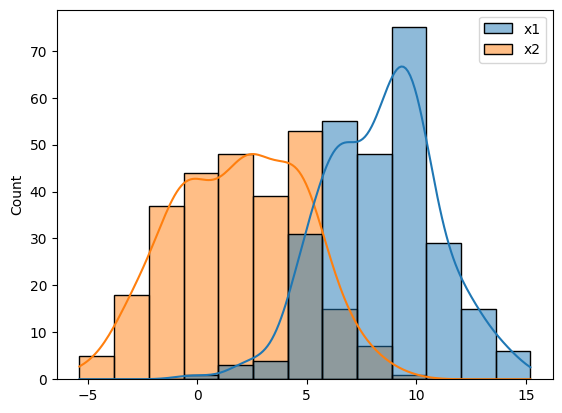

In [54]:
# Plot histogram of both the x1 and x2
df2plot = df[["x1", "x2"]]

sns.histplot(df2plot, kde=True)
plt.title("Histogram")
plt.show()

Based on these plots, provide a description of your data:

Your response here: Comparing x1 and x2 in the histogram, I can realize that x2 takes negative valus starting arounf -5 to 10, while x1 look like it goes from 0 to 15. Around 0 to 10 they share some values, but when the count of x1 starts to raise the count of x2 begins to fall. Also, x1 has the highest count in the values around 10 with more than 70.

Plot in the same figure the boxplot of two variables

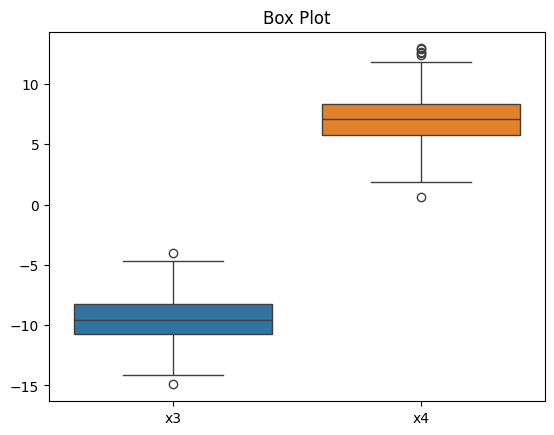

In [71]:
#the boxplots of the "x3" and of the "x4" amounts
df2plot = df[["x3","x4"]]
sns.boxplot(df2plot)

plt.title("Box Plot")
plt.show()


Plot the scatter plot of two variables

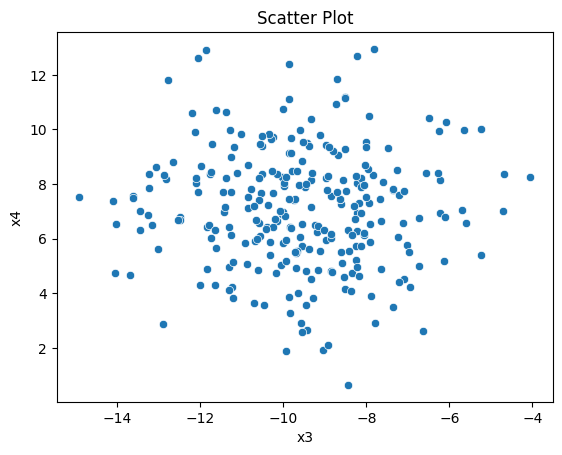

In [70]:
# scatter plot between two variables
sns.scatterplot(data=df, y = "x4", x="x3")
plt.title("Scatter Plot")
plt.show()

### Questions

Based on the previos plots, provide a description of yout dataset

Your response: Eventhough the range of our values isnt very high, I noticed that between variables, the values of eache variable tend to be in a certain range that does not mixes with another variable. Fo example in the histogram of x1 and x2 most of the values of x2 were lower than the ones in x1. And in the boxplot of x3 and x4, bth groups are clearly set apart of the other, in fact we I made the scatter plot of these two most of the points where rigt at the middle with not clear tendency at plain sight.




## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [155]:
#df.drop("Unnamed: 0", axis=1, inplace = True)

# Define number of clusters
K  = 3 # Let's assume there are 2,3,4,5...? clusters/groups

# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
yestimated = km.fit_predict(df)

df

,x1,x2,x3,x4,yestimated
0,6.267097,-1.981469,-7.921625,6.529245,2
1,8.981154,6.372085,-9.468937,7.878236,1
2,11.730386,4.675443,-11.198126,9.376762,1
3,7.734167,2.228510,-10.856989,7.537230,2
4,9.938866,1.907787,-7.033765,5.774997,1
...,...,...,...,...,...
262,9.075590,0.149023,-10.170969,4.761219,2
263,7.301346,-1.805849,-5.611247,6.575809,2
264,10.480461,1.545009,-8.714995,7.726354,1
265,9.919444,5.835001,-11.745777,8.440677,1


Add to your dataset a column with the estimated cluster to each data point

In [156]:
# Add a new column to the dataset with the cluster information
df['yestimated'] = yestimated

df

,x1,x2,x3,x4,yestimated
0,6.267097,-1.981469,-7.921625,6.529245,2
1,8.981154,6.372085,-9.468937,7.878236,0
2,11.730386,4.675443,-11.198126,9.376762,0
3,7.734167,2.228510,-10.856989,7.537230,1
4,9.938866,1.907787,-7.033765,5.774997,0
...,...,...,...,...,...
262,9.075590,0.149023,-10.170969,4.761219,2
263,7.301346,-1.805849,-5.611247,6.575809,2
264,10.480461,1.545009,-8.714995,7.726354,0
265,9.919444,5.835001,-11.745777,8.440677,0


Print the number associated to each cluster

In [157]:
# Print estimated cluster of each point in the dataset
yestimated

array([2, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0,
       1, 0, 0, 2, 0, 2, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1,
       2, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 2,
       1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1,
       0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 1, 0,
       0, 2, 0, 2, 1, 0, 2, 1, 0, 0, 2, 1, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2,
       0, 0, 1], dtype=int32)

Print the centroids

In [158]:
# Cluster centroides
km.cluster_centers_

array([[10.28741661,  4.12728706, -9.41413722,  6.09562815,  1.02521008],
       [ 6.1874986 ,  2.37270047, -9.70167257,  8.23303552,  1.85245902],
       [ 7.33573254, -1.42719281, -9.77542293,  7.70571818,  1.01149425]])

Print the intertia metric

In [159]:
# Sum of squared error (sse) of the final model
km.inertia_

3729.3866164385545

Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

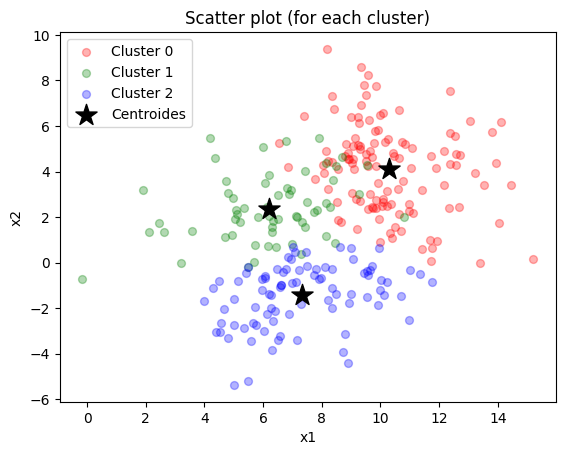

In [160]:
# Get a dataframe with the data of each clsuter
df1 = df[df.yestimated==0]
df2 = df[df.yestimated==1]
df3 = df[df.yestimated==2]

# Scatter plot of each cluster
plt.scatter(df1.x1, df1.x2, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.x1, df2.x2, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3.x1, df3.x2, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Questions

Provides a detailed description of your results

Your response: After clustering with k means, with k=3, the model groups togeteher the values in 3 groups, as we specified. At plain sight I would say that the groups may not be as clear as one could think. In order to make this work, I had to drop the first column because eventhough the values were Integeres, it was a categorical variable that was putting the Centroids very far away from where our actual data was. The Inertia is above 3500, this can tell us that maybe with k=3 we are not getting the best possible grouping for our variables.

## A5 Elbow plot

Compute the Elbow plot

In [161]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df[['x1','x2']])
    # Save sse for each k
    sse.append(km.inertia_)


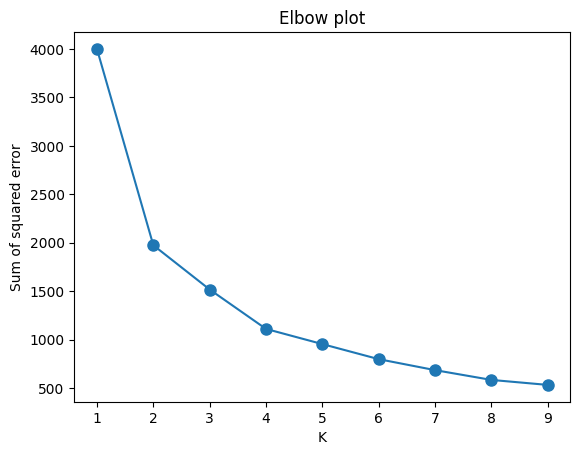

In [162]:
# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response: Looking at the elbow plot I can identify 2 inflexion points, 3 and 4. I did the clusters with k=3, but it looks like with k=4 I could get a better answer. However, the Sum of Squared Errors drops from 5 until 9 but not a lot, I also made the Elbow plot in range 1 to 15, and after 9 the value of SSE almost stay constant, dropping very little from that point on. That said, I say that the best number of clusters is 4.


Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response: At first I thought that doing 3 groups, like the previous activities, would be a fair assumption. However, after seeing the elbow graph, I think k = 4 may be a better guess, because it is still an inflection point and its SSE has a significant drop compared to k = 3, after 4, the elbow graph decreases and decelerates until reaching 9. So, concluding, my initial guess didnt match the ideal number.



# PART 2
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta: Durante esta semana interactue con distintos data sets los cuales representaban distintas variables. A medida que progrese en las actividades me di cuenta que cada vez más fui capaz de ir identificando las relaciones entre variables de mejor manera apoyandome de las disitintas visualizaciones como Scatter Plot, Histogramas y los diagramas de caja y bigotes. En especial con el Scatter Plot, ya que este me permitia ver como se distribuian 2 variables, como se agrupaban sus datos, e incluso en algunos casos pude identificar lineas de tendencia entre esas 2 variables. Tambien, pude ser capaz de identificar como una misma variable iba cambiando al ser categorizada en las variables categoricas que habia en algunos datasets. Despues de haber terminado esta evidencia y todas las actividades del curso puedo afirmar que si desarrolle esta subcompetencia de manera exitosa pues fui capaz de darle una interpetacion a la relacion que exisitia entre 2 variables apoyandome de los datos y sus representaciones visuales.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta: En esta semana tec exploramos 1 modelo el cual fue kmeans, un algoritmo de aprendizaje no supervisado. En las actividades realizadas comprendi la utilidad de este modelo y todas su partes para tratar de predecir la agrupacion de datos. Entendi que este modelo no es más que un algoritmo el cual no tenemos necesidad de reinventar, simplmente podemos aplicarlo, tal como lo hice en la actividad del dia jueves, pero ya existen librerias que son capaces de aplicarlo, de tal modo que a mi solo me queda interpretarlo y evaluarlo utilizando el Elbow plot, ya que a fin de cuentas uno mismo es el que define el principio el numero de k's. Gracias a lo aprendido en este curso desarrolle de la forma esperada la subcompetencia de construir modelos, pues ahora soy capaz de entenderlos, replicarlos, explicarlos y evaluarlos.